In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import xgboost as xgb
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("LoanApprovalPrediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df["Dependents"].unique()

array([ 0.,  1.,  2.,  3., nan])

In [5]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [6]:
df["Dependents"].value_counts()

0.0    338
1.0    101
2.0     99
3.0     48
Name: Dependents, dtype: int64

In [7]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

df.isnull().sum()/len(df)*100

In [8]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [9]:
c_cols=df.select_dtypes(include=['object']).columns
c_cols

Index(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
n_cols=df.select_dtypes(include=["int","float"]).columns
n_cols

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [11]:
for i in n_cols:
    print(i, df[i].isnull().sum())

Dependents 12
ApplicantIncome 0
CoapplicantIncome 0
LoanAmount 21
Loan_Amount_Term 14
Credit_History 49


In [12]:
for i in n_cols:
    df[i].fillna(df[i].median(), inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         598 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     598 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

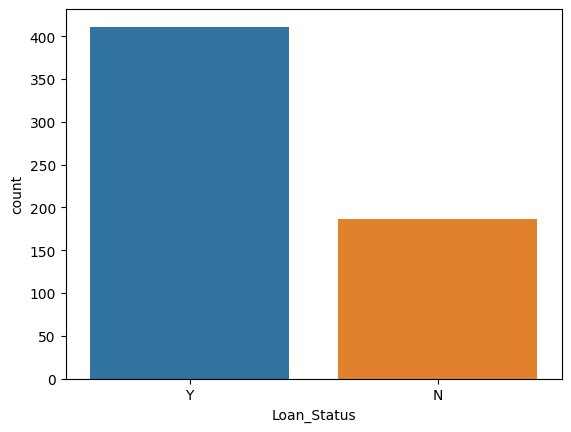

In [14]:
sns.countplot(df.Loan_Status)

In [15]:
df.drop(["Loan_ID"],axis=1,inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
#for i in c_cols:
   #df[i]=le.fit_transform(df[i])
    

In [18]:
X=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]


In [19]:
df["Credit_History"].value_counts()

1.0    512
0.0     86
Name: Credit_History, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)

In [22]:
X_train.shape

(418, 11)

In [23]:
X_test.shape

(180, 11)

In [24]:
y_train.shape

(418,)

In [25]:
y_test.shape

(180,)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

In [27]:
lr=LogisticRegression(solver="liblinear",penalty='l2')
kn=KNeighborsClassifier(n_neighbors=5)
svm=SVC(gamma="auto",random_state=0)

In [28]:
cf=ColumnTransformer([("trf",OneHotEncoder(sparse=False,drop="first"),['Gender', 'Married', 'Education', 'Self_Employed','Property_Area'])],remainder="passthrough")

In [29]:
pipe=Pipeline(steps=[("step1",cf),
                    ("step2",LogisticRegression(solver="liblinear"))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [30]:
y_pred=pipe.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
 

In [31]:
pipe.predict_proba(X_test)

array([[0.21798677, 0.78201323],
       [0.31946743, 0.68053257],
       [0.2251512 , 0.7748488 ],
       [0.93102775, 0.06897225],
       [0.25410713, 0.74589287],
       [0.26594829, 0.73405171],
       [0.92398477, 0.07601523],
       [0.17662619, 0.82337381],
       [0.28960197, 0.71039803],
       [0.31462709, 0.68537291],
       [0.1499376 , 0.8500624 ],
       [0.31513127, 0.68486873],
       [0.91915625, 0.08084375],
       [0.41175123, 0.58824877],
       [0.2068826 , 0.7931174 ],
       [0.14601964, 0.85398036],
       [0.16175473, 0.83824527],
       [0.40867107, 0.59132893],
       [0.89947763, 0.10052237],
       [0.12592958, 0.87407042],
       [0.37758242, 0.62241758],
       [0.24538479, 0.75461521],
       [0.25040183, 0.74959817],
       [0.11294374, 0.88705626],
       [0.13048334, 0.86951666],
       [0.13633359, 0.86366641],
       [0.32730035, 0.67269965],
       [0.27151795, 0.72848205],
       [0.85929513, 0.14070487],
       [0.17034029, 0.82965971],
       [0.

<AxesSubplot:>

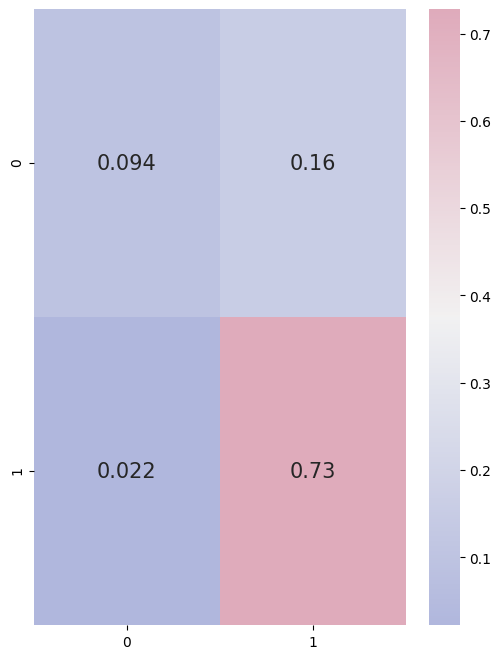

In [32]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(6,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [33]:
import pickle
pickle.dump(pipe, open('loan.pkl', 'wb'))
